# Quantify task performance as a function of rule presentations (each rule)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import analyzeBehavior as analyze
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.style.use("ggplot")
# sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Arial"
import statsmodels.api as sm
import statsmodels.stats.multitest as mc


##### Load and sort data

In [2]:
datadir = '../../../data/fMRI_BehavData/'
figuredir = '../../figures/manuscriptFigures/Fig1_HumanBehavior/'


subjNums = ['013','014','016','017','018','021','023','024','026','027','028','030','031','032','033',
            '034','035','037','038','039','040','041','042','043','045','046','047','048','049','050',
            '053','055','056','057','058','062','063','066','067','068','069','070','072','074','075',
            '076','077','081','085','086','087','088','090','092','093','094','095','097','098','099',
            '101','102','103','104','105','106','108','109','110','111','112','114','115','117','119',
            '120','121','122','123','124','125','126','127','128','129','130','131','132','134','135',
            '136','137','138','139','140','141']
# # ### Doesn't need to be run again

# keyValues = {'Logic':'LogicCue[LogLevel5]', 'Sensory':'SemanticCue[LogLevel5]', 'Motor':'ResponseCue[LogLevel5]','Accuracy':'Feedback[LogLevel6]', 'Novelty':'TaskType_rec', 'TaskNum':'TaskName[LogLevel5]',
#              'PracTaskIntro':'PracIntroExampleList',
#              'LogicExample':'LogicCue[SubTrial]','SensoryExample':'SemanticCue[SubTrial]','MotorExample':'ResponseCue[SubTrial]',
#              'PracIntroAccuracy':'Feedback[LogLevel5]','RT':'ProbeStim1.RT'}
# # Simplify dataframe into easier key-value strings
# for subj in subjNums:
#     df = pd.read_csv(datadir + subj + '_behavdata.csv')
#     df_new = {}
#     for key in keyValues:
#         df_new[key] = df[keyValues[key]].values
        
#     df = pd.DataFrame(df_new)
#     df.to_csv(datadir + subj + '_behavdata_reformatted.csv')
        

# Plot performances across different conditions
* Novel and practiced conditions
* 1st presentation of practiced tasks, 2nd presentation of practiced tasks
* 1st presentation of novel tasks, 2nd presentation of novel tasks

# Plot by rule presentation (First presentation of tasks only): Accuracy

In [3]:
analyze = reload(analyze)
df_acc = analyze.behaviorAcrossRuleInstances(subjNums,behavior='Accuracy',novelOnly=True)
df_acc.Accuracy = df_acc.Accuracy.values * 100.0
df_avg = df_acc
# #### Now sort data
# rules = np.unique(df_acc.Rule.values)
# tmp_instances = []
# for instance in np.unique(df_acc.RuleInstance.values):
#     tmp_df = df_acc.loc[df_acc.RuleInstance==instance]
#     tmprules = []
#     for rule in rules:
#         tmp_df_rule = tmp_df.loc[tmp_df.Rule==rule]
#         tmp_df_rule = tmp_df_rule.mean(0)
#         tmp_df_rule['Rule'] = rule
#         tmprules.append(tmp_df_rule)
#     tmp_instances.append(pd.DataFrame(tmprules))
# #     tmp_instances.append(pd.concat(tmprules))
# # df_avg = pd.DataFrame(tmp_instances)
# df_avg = pd.concat(tmp_instances)
# del df_avg['Subject']

# Now plot by rule domain

In [4]:
from sklearn import linear_model

,Q-values,Rule,Beta,P-value
0,0.337459,**BOTH**,0.116567,0.309338
1,0.377602,*EITHER*,0.124008,0.377602
2,0.000134,NEITHER*,0.809772,0.000015
3,0.000278,NOT*BOTH,0.822173,0.000070
4,0.003487,**RED***,0.510913,0.001169
5,0.011768,VERTICAL,0.446429,0.007173
6,0.003487,HI*PITCH,0.562996,0.001453
7,0.014447,CONSTANT,0.486111,0.010836
8,0.011768,*LEFT*INDEX*,0.498512,0.006548
9,0.000134,LEFT*MIDDLE*,0.718006,0.000022


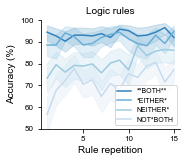

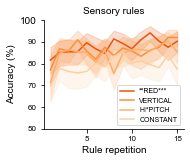

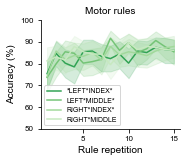

In [12]:
palette = sns.color_palette("Set2")
palette = sns.color_palette("tab20c")

# tmp_df = df_acc.loc[df_acc['Block']==1]
# nov_acc = df_acc.loc[df_acc['Condition']=='Novel']
# print('Practice accuracy:', np.mean(prac_acc.Accuracy.values))
# print('Novel accuracy:', np.mean(nov_acc.Accuracy.values))
# t, p = stats.ttest_rel(prac_acc.Accuracy.values,nov_acc.Accuracy.values)
# print('Practiced versus Novel: t =', t, '| p =', p)

logic = ['**BOTH**', '*EITHER*', 'NEITHER*', 'NOT*BOTH']
sensory = ['**RED***', 'VERTICAL', 'HI*PITCH', 'CONSTANT']
motor = ['*LEFT*INDEX*', 'LEFT*MIDDLE*', 'RIGHT*INDEX*', 'RIGHT*MIDDLE']
df_stats = {}
df_stats['Rule'] = []
df_stats['Beta'] = []
df_stats['P-value'] = []

plt.figure(figsize=(2.5,2))
plt.title('Logic rules',fontsize=10)
# ax = sns.boxplot(x="RuleInstance",y="Accuracy",data=df_avg,
#            medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
# ax = sns.stripplot(x="RuleInstance",y="Accuracy",data=df_avg,
#               dodge=True,palette="pastel")
i = 0
for rule in logic:
    tmp_df = df_avg.loc[df_avg.Rule==rule]
    X = tmp_df.RuleInstance.values
    X = sm.add_constant(X)
    y = tmp_df.Accuracy.values
    model = sm.OLS(y, X)
    results = model.fit()
    df_stats['Rule'].append(rule)
    df_stats['Beta'].append(results.params[1])
    df_stats['P-value'].append(results.pvalues[1])
#     print(rule, 'beta =', results.params[1], 'p =', results.pvalues[1])
    ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=tmp_df,label=rule,color=palette[i])
    i += 1
# ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=df_avg,label=rule)
plt.xticks(rotation=0,fontsize=8)
plt.yticks(fontsize=8)
plt.ylim([50,100])
plt.ylabel('Accuracy (%)',fontsize=10)
plt.xlabel('Rule repetition', fontsize=10)
# plt.tight_layout()
sns.despine()
plt.legend(fontsize=7)
plt.savefig(figuredir + 'AccuracyVsRuleRepetition_Logic.png',dpi=300)

plt.figure(figsize=(2.5,2))
plt.title('Sensory rules',fontsize=10)
# ax = sns.boxplot(x="RuleInstance",y="Accuracy",data=df_avg,
#            medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
# ax = sns.stripplot(x="RuleInstance",y="Accuracy",data=df_avg,
#               dodge=True,palette="pastel")
# i=0
for rule in sensory:
    tmp_df = df_avg.loc[df_avg.Rule==rule]
    X = tmp_df.RuleInstance.values
    X = sm.add_constant(X)
    y = tmp_df.Accuracy.values
    model = sm.OLS(y, X)
    results = model.fit()
    df_stats['Rule'].append(rule)
    df_stats['Beta'].append(results.params[1])
    df_stats['P-value'].append(results.pvalues[1])
#     print(rule, 'beta =', results.params[1], 'p =', results.pvalues[1])
    X = np.arange(len(tmp_df.Accuracy.values))
    X = sm.add_constant(X)
    ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=tmp_df,label=rule,color=palette[i])
    i += 1
# ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=df_avg,label=rule)
plt.xticks(rotation=0,fontsize=8)
plt.yticks(fontsize=8)
plt.ylim([50,100])
plt.ylabel('Accuracy (%)',fontsize=10)
plt.xlabel('Rule repetition', fontsize=10)
# plt.tight_layout()
sns.despine()
plt.legend(fontsize=7)
plt.savefig(figuredir + 'AccuracyVsRuleRepetition_Sensory.png',dpi=300)


plt.figure(figsize=(2.5,2))
plt.title('Motor rules',fontsize=10)
# ax = sns.boxplot(x="RuleInstance",y="Accuracy",data=df_avg,
#            medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
# ax = sns.stripplot(x="RuleInstance",y="Accuracy",data=df_avg,
#               dodge=True,palette="pastel")
# i=0
for rule in motor:
    tmp_df = df_avg.loc[df_avg.Rule==rule]
    X = tmp_df.RuleInstance.values
    X = sm.add_constant(X)
    y = tmp_df.Accuracy.values
    model = sm.OLS(y, X)
    results = model.fit()
    df_stats['Rule'].append(rule)
    df_stats['Beta'].append(results.params[1])
    df_stats['P-value'].append(results.pvalues[1])
#     print(rule, 'beta =', results.params[1], 'p =', results.pvalues[1])
    ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=tmp_df,label=rule,color=palette[i])
    i+=1
# ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=df_avg,label=rule)
plt.xticks(rotation=0,fontsize=8)
plt.yticks(fontsize=8)
plt.ylim([50,100])
plt.ylabel('Accuracy (%)',fontsize=10)
plt.xlabel('Rule repetition', fontsize=10)
# plt.tight_layout()
plt.legend(fontsize=7)
sns.despine()
plt.savefig(figuredir + 'AccuracyVsRuleRepetition_Motor.png',dpi=300)


df_stats = pd.DataFrame(df_stats)
#### Run multiple comparisons and print out statistics
pvals = df_stats['P-value'].values
qvals = mc.fdrcorrection(pvals)[1]
df_stats.insert(loc=0, column='Q-values', value=qvals)

df_stats

# Plot by rule presentation (First presentation of tasks only): RT

In [240]:
analyze = reload(analyze)
df_acc = analyze.behaviorAcrossRuleInstances(subjNums,behavior='RT')

df_avg = df_acc
# #### Now sort data
# rules = np.unique(df_acc.Rule.values)
# tmp_instances = []
# for instance in np.unique(df_acc.RuleInstance.values):
#     tmp_df = df_acc.loc[df_acc.RuleInstance==instance]
#     tmprules = []
#     for rule in rules:
#         tmp_df_rule = tmp_df.loc[tmp_df.Rule==rule]
#         tmp_df_rule = tmp_df_rule.mean(0)
#         tmp_df_rule['Rule'] = rule
#         tmprules.append(tmp_df_rule)
#     tmp_instances.append(pd.DataFrame(tmprules))
# #     tmp_instances.append(pd.concat(tmprules))
# # df_avg = pd.DataFrame(tmp_instances)
# df_avg = pd.concat(tmp_instances)
# del df_avg['Subject']

/Users/tito/Drive/!Research/Projects/IBMCompositionality/docs/scripts/empiricalScripts/analyzeBehavior.py:281: RuntimeWarning: Mean of empty slice
  #if ind[0] in secondblock_ind:
/Users/tito/Drive/!Research/Projects/IBMCompositionality/docs/scripts/empiricalScripts/analyzeBehavior.py:304: RuntimeWarning: Mean of empty slice
  #if ind[0] in secondblock_ind:
/Users/tito/Drive/!Research/Projects/IBMCompositionality/docs/scripts/empiricalScripts/analyzeBehavior.py:327: RuntimeWarning: Mean of empty slice
  #if ind[0] in secondblock_ind:


# Now plot by rule domain

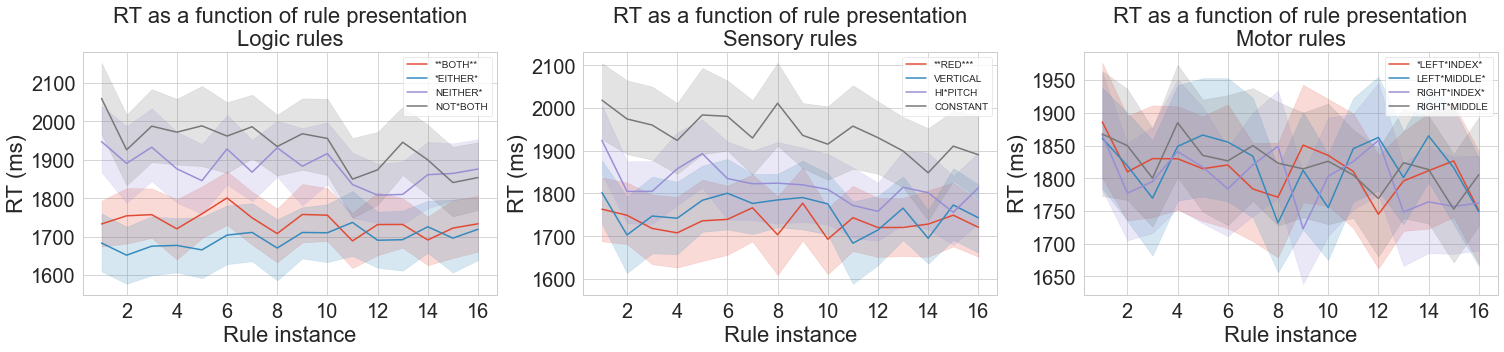

In [243]:

# tmp_df = df_acc.loc[df_acc['Block']==1]
# nov_acc = df_acc.loc[df_acc['Condition']=='Novel']
# print('Practice accuracy:', np.mean(prac_acc.Accuracy.values))
# print('Novel accuracy:', np.mean(nov_acc.Accuracy.values))
# t, p = stats.ttest_rel(prac_acc.Accuracy.values,nov_acc.Accuracy.values)
# print('Practiced versus Novel: t =', t, '| p =', p)

logic = ['**BOTH**', '*EITHER*', 'NEITHER*', 'NOT*BOTH']
sensory = ['**RED***', 'VERTICAL', 'HI*PITCH', 'CONSTANT']
motor = ['*LEFT*INDEX*', 'LEFT*MIDDLE*', 'RIGHT*INDEX*', 'RIGHT*MIDDLE']

plt.figure(figsize=(21,5))
plt.subplot(131)
plt.title('RT as a function of rule presentation\nLogic rules',fontsize=22)
# ax = sns.boxplot(x="RuleInstance",y="Accuracy",data=df_avg,
#            medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
# ax = sns.stripplot(x="RuleInstance",y="Accuracy",data=df_avg,
#               dodge=True,palette="pastel")
for rule in logic:
    tmp_df = df_avg.loc[df_avg.Rule==rule]
    ax = sns.lineplot(x="RuleInstance",y="RT",data=tmp_df,label=rule)
# ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=df_avg,label=rule)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('RT (ms)',fontsize=22)
plt.xlabel('Rule instance', fontsize=22)
plt.tight_layout()

plt.subplot(132)
plt.title('RT as a function of rule presentation\nSensory rules',fontsize=22)
# ax = sns.boxplot(x="RuleInstance",y="Accuracy",data=df_avg,
#            medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
# ax = sns.stripplot(x="RuleInstance",y="Accuracy",data=df_avg,
#               dodge=True,palette="pastel")
for rule in sensory:
    tmp_df = df_avg.loc[df_avg.Rule==rule]
    ax = sns.lineplot(x="RuleInstance",y="RT",data=tmp_df,label=rule)
# ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=df_avg,label=rule)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('RT (ms)',fontsize=22)
plt.xlabel('Rule instance', fontsize=22)
plt.tight_layout()

plt.subplot(133)
plt.title('RT as a function of rule presentation\nMotor rules',fontsize=22)
# ax = sns.boxplot(x="RuleInstance",y="Accuracy",data=df_avg,
#            medianprops={'linestyle':'-'},sym='',whis=[2.5,97.5],palette="pastel")
# ax = sns.stripplot(x="RuleInstance",y="Accuracy",data=df_avg,
#               dodge=True,palette="pastel")
for rule in motor:
    tmp_df = df_avg.loc[df_avg.Rule==rule]
    ax = sns.lineplot(x="RuleInstance",y="RT",data=tmp_df,label=rule)
# ax = sns.lineplot(x="RuleInstance",y="Accuracy",data=df_avg,label=rule)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('RT (ms)',fontsize=22)
plt.xlabel('Rule instance', fontsize=22)
plt.tight_layout()